#### Problem Statement
## XYZ Co's 2014-2018 sales data to identify key revenue and profit drivers across products, channels, and regions, uncover seasonal trends and outliers, and align performance against budgets. Use these insights to optimize pricing, promotions and market expansion for sustainable growth and reduced concentration risk.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sheets = pd.read_excel('/Users/tharuntejamuthyala/Downloads/Sales Analysis/Regional_Sales_Dataset.xlsx', sheet_name = None)

In [3]:
#### Assign Data Frames to each sheet
## sheets → A dictionary containing all sheets.
## Sales Orders' → The key for one specific sheet.
## df_sales → A DataFrame holding the data from that sheet.
df_sales = sheets['Sales Orders']
df_customers = sheets['Customers']
df_regions = sheets['Regions']
df_state_reg = sheets['State Regions']
df_budgets = sheets['2023 Budgets']
df_products = sheets['Products']

In [4]:
df_sales.head()
##The .head() method in Pandas returns the first 5 rows of your DataFrame by default

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2020-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2020-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2020-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2020-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2020-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [5]:
df_sales.shape
##(shape)_how many rows and columns it has.

(64104, 12)

In [6]:
print ("df_sales.shape:",(df_sales.shape))
print ("df_customers.shape:",(df_customers.shape))
print ("df_regions.shape:",(df_regions.shape))
print ("df_state_reg.shape:",(df_state_reg.shape))
print ("df_budgets.shape:",(df_budgets.shape))

df_sales.shape: (64104, 12)
df_customers.shape: (175, 2)
df_regions.shape: (994, 15)
df_state_reg.shape: (49, 3)
df_budgets.shape: (30, 2)


In [7]:
df_sales.head(5)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2020-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343
1,SO - 0003378,2020-01-01,96,Distributor,USD,AXW291,488,20,11,2351.7,25868.7,1269.918
2,SO - 0005126,2020-01-01,8,Wholesale,USD,AXW291,155,26,6,978.2,5869.2,684.740
3,SO - 0005614,2020-01-01,42,Export,USD,AXW291,473,7,7,2338.3,16368.1,1028.852
4,SO - 0005781,2020-01-01,73,Wholesale,USD,AXW291,256,8,8,2291.4,18331.2,1260.270


In [8]:
df_customers.head(5)


,Customer Index,Customer Names
0,1,Geiss Company
1,2,Jaxbean Group
2,3,Ascend Ltd
3,4,Eire Corp
4,5,Blogtags Ltd


In [9]:
df_regions.head(5)

,id,name,county,state_code,state,type,latitude,longitude,area_code,population,households,median_income,land_area,water_area,time_zone
0,1,Auburn,Lee County,AL,Alabama,City,32.60986,-85.48078,334,62059,21767,38342,152375113,2646161,America/Chicago
1,2,Birmingham,Shelby County/Jefferson County,AL,Alabama,City,33.52744,-86.79905,205,212461,89972,31061,378353942,6591013,America/Chicago
2,3,Decatur,Limestone County/Morgan County,AL,Alabama,City,34.57332,-86.99214,256,55437,22294,41496,141006257,17594716,America/Chicago
3,4,Dothan,Dale County/Houston County/Henry County,AL,Alabama,City,31.23370,-85.40682,334,68567,25913,42426,232166237,835468,America/Chicago
4,5,Hoover,Shelby County/Jefferson County,AL,Alabama,City,33.37695,-86.80558,205,84848,32789,77146,122016784,2553332,America/Chicago


In [10]:
df_state_reg.head(5)

,Column1,Column2,Column3
0,State Code,State,Region
1,AL,Alabama,South
2,AR,Arkansas,South
3,AZ,Arizona,West
4,CA,California,West


In [11]:
# Take the first row as the new header
new_header = df_state_reg.iloc[0]

## df_state_reg[1:] → Skips the first row of the DataFrame
## reset_index() → Resets the index back to 0, 1, 2, ...
## drop=True → Ensures the old index is not added as a new column.
df_state_reg = df_state_reg[1:].reset_index(drop=True)

# Assign the new headers to the column
df_state_reg.columns = new_header
df_state_reg.head(5)

,State Code,State,Region
0,AL,Alabama,South
1,AR,Arkansas,South
2,AZ,Arizona,West
3,CA,California,West
4,CO,Colorado,West


In [12]:
df_budgets.head(5)

,Product Name,2023 Budgets
0,Product 1,3016489.209
1,Product 2,3050087.565
2,Product 3,2642352.432
3,Product 4,2885560.824
4,Product 5,3925424.542


In [13]:
df_products.head(5)

,Index,Product Name
0,1,Product 1
1,2,Product 2
2,3,Product 3
3,4,Product 4
4,5,Product 5


## Checking Null values in data set

In [14]:
df_sales.isnull().sum()

OrderNumber                  0
OrderDate                    0
Customer Name Index          0
Channel                      0
Currency Code                0
Warehouse Code               0
Delivery Region Index        0
Product Description Index    0
Order Quantity               0
Unit Price                   0
Line Total                   0
Total Unit Cost              0
dtype: int64

In [15]:
df_products.isnull().sum()

Index           0
Product Name    0
dtype: int64

In [16]:
df_budgets.isnull().sum()

Product Name    0
2023 Budgets    0
dtype: int64

In [17]:
df_state_reg.isnull().sum()

0
State Code    0
State         0
Region        0
dtype: int64

In [18]:
df_regions.isnull().sum()

id               0
name             0
county           0
state_code       0
state            0
type             0
latitude         0
longitude        0
area_code        0
population       0
households       0
median_income    0
land_area        0
water_area       0
time_zone        0
dtype: int64

In [19]:
df_customers.isnull().sum()

Customer Index    0
Customer Names    0
dtype: int64

In [20]:
df_sales.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost
0,SO - 000225,2020-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343


#### DATA CLEANING AND WRANGLING

In [21]:
# Merge with customers 

df = df_sales.merge(
    df_customers,
    how='left',
    left_on= 'Customer Name Index',
    right_on= 'Customer Index'
)
### df_sales → Left DataFrame (base table).
### df_customers → Right DataFrame (lookup table).
### Join Type: how='left'
# Keeps all rows from df_sales.
# Adds matching customer info from df_customers.
## If no match, you'll get NaN in the customer-related columns.
### Keys: df_sales['Customer Name Index'] is matched with df_customers['Customer Index'].

In [22]:
df.head(1)

,OrderNumber,OrderDate,Customer Name Index,Channel,Currency Code,Warehouse Code,Delivery Region Index,Product Description Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,Customer Index,Customer Names
0,SO - 000225,2020-01-01,126,Wholesale,USD,AXW291,364,27,6,2499.1,14994.6,1824.343,126,Rhynoodle Ltd


In [23]:
## Merge with products

df = df.merge(
    df_products,
    how='left',
    left_on= 'Product Description Index',
    right_on= 'Index'
)

In [24]:
## Merge with regions

df = df.merge(
    df_regions,
    how='left',
    left_on= 'Delivery Region Index',
    right_on= 'id'
)

In [25]:
## Merge with State regions

df = df.merge(
    df_state_reg[['State Code','Region']],
    how='left',
    left_on= 'state_code',
    right_on= 'State Code'
)

In [26]:
## Merge with budgets

df = df.merge(
    df_budgets,
    how='left',
    on= 'Product Name'
)

In [27]:
df.to_csv("file.csv")

### CLEANUP REDUNANT(UNWANTED) COLUMNS

In [28]:
# Customer Index
# Index
# id
# Product Description Index
# State Code
cols_to_drop = ['Customer Name Index','Index', 'id','Product Description Index','State Code']
df = df.drop(columns= cols_to_drop,errors='ignore')
df.head(5)

,OrderNumber,OrderDate,Channel,Currency Code,Warehouse Code,Delivery Region Index,Order Quantity,Unit Price,Line Total,Total Unit Cost,...,longitude,area_code,population,households,median_income,land_area,water_area,time_zone,Region,2023 Budgets
0,SO - 000225,2020-01-01,Wholesale,USD,AXW291,364,6,2499.1,14994.6,1824.343,...,-81.09983,912,145674,52798,36466,268318796,13908113,America/New York,South,964940.231
1,SO - 0003378,2020-01-01,Distributor,USD,AXW291,488,11,2351.7,25868.7,1269.918,...,-86.10665,317,55586,20975,54176,72276415,1883,America/Indiana/Indianapolis,Midwest,2067108.120
2,SO - 0005126,2020-01-01,Wholesale,USD,AXW291,155,6,978.2,5869.2,684.740,...,-121.87468,925,79510,26020,124759,62489257,386195,America/Los Angeles,West,5685138.270
3,SO - 0005614,2020-01-01,Export,USD,AXW291,473,7,2338.3,16368.1,1028.852,...,-86.52639,812,84067,30232,30019,60221613,475857,America/Indiana/Indianapolis,Midwest,889737.555
4,SO - 0005781,2020-01-01,Wholesale,USD,AXW291,256,8,2291.4,18331.2,1260.270,...,-72.52443,959,58007,24141,63158,70972793,720300,America/New York,Northeast,1085037.329


In [29]:
# Convert all columns to lower xase for consistency and easier access
df.columns= df.columns.str.lower()
df.columns.values

array(['ordernumber', 'orderdate', 'channel', 'currency code',
       'warehouse code', 'delivery region index', 'order quantity',
       'unit price', 'line total', 'total unit cost', 'customer index',
       'customer names', 'product name', 'name', 'county', 'state_code',
       'state', 'type', 'latitude', 'longitude', 'area_code',
       'population', 'households', 'median_income', 'land_area',
       'water_area', 'time_zone', 'region', '2023 budgets'], dtype=object)

In [30]:
# keep the imp columns and remove the columns which are not needed
cols_to_keep = [
    'ordernumber',
    'orderdate',
    'customer names',
    'channel',
    'product name',
    'order quantity',
    'unit price',
    'line total',
    'total unit cost',
    'state_code',
    'county',
    'state',
    'region',
    'latitude',
    'longitude',
    '2023 budgets'
]

In [31]:
df = df[cols_to_keep]

In [32]:
df.head(5)

,ordernumber,orderdate,customer names,channel,product name,order quantity,unit price,line total,total unit cost,state_code,county,state,region,latitude,longitude,2023 budgets
0,SO - 000225,2020-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,964940.231
1,SO - 0003378,2020-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,2067108.120
2,SO - 0005126,2020-01-01,Amerisourc Corp,Wholesale,Product 26,6,978.2,5869.2,684.740,CA,Alameda County,California,West,37.66243,-121.87468,5685138.270
3,SO - 0005614,2020-01-01,Colgate-Pa Group,Export,Product 7,7,2338.3,16368.1,1028.852,IN,Monroe County,Indiana,Midwest,39.16533,-86.52639,889737.555
4,SO - 0005781,2020-01-01,Deseret Group,Wholesale,Product 8,8,2291.4,18331.2,1260.270,CT,Hartford County,Connecticut,Northeast,41.77524,-72.52443,1085037.329


In [33]:
## Rename the columns 
df = df.rename(columns ={
    'ordernumber' : 'order_number',
    'orderdate':'order_date',
    'customer names':'customer_name',
    'product name':'product_name',
    'order quantity':'order_quantity',
    'unit price':'unit_price',
    'line total':'revenue',
    'total unit cost':'total_unit_cost',
    'state':'state_name',
    '2023 budgets': 'budget'
})

In [34]:
## Blank out budget for non 2023 orders

df.loc[df['order_date'].dt.year !=2023,'budget'] = pd. NA

## Line total is revenue
df[['order_date','product_name','revenue','budget']].head(5)

,order_date,product_name,revenue,budget
0,2020-01-01,Product 27,14994.6,NaN
1,2020-01-01,Product 20,25868.7,NaN
2,2020-01-01,Product 26,5869.2,NaN
3,2020-01-01,Product 7,16368.1,NaN
4,2020-01-01,Product 8,18331.2,NaN


In [35]:
df.to_csv('final.csv')

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64104 entries, 0 to 64103
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   order_number     64104 non-null  object        
 1   order_date       64104 non-null  datetime64[ns]
 2   customer_name    64104 non-null  object        
 3   channel          64104 non-null  object        
 4   product_name     64104 non-null  object        
 5   order_quantity   64104 non-null  int64         
 6   unit_price       64104 non-null  float64       
 7   revenue          64104 non-null  float64       
 8   total_unit_cost  64104 non-null  float64       
 9   state_code       64104 non-null  object        
 10  county           64104 non-null  object        
 11  state_name       64104 non-null  object        
 12  region           64104 non-null  object        
 13  latitude         64104 non-null  float64       
 14  longitude        64104 non-null  float

In [37]:
## Filtering the data set which include only records of 2023
df_2023=df[df['order_date'].dt.year == 2023]

In [38]:
df.isnull().sum()
#count of null vlaues per column
# 0 no missing value
# if any value, then missing some value/data

order_number           0
order_date             0
customer_name          0
channel                0
product_name           0
order_quantity         0
unit_price             0
revenue                0
total_unit_cost        0
state_code             0
county                 0
state_name             0
region                 0
latitude               0
longitude              0
budget             48841
dtype: int64

In [39]:
df_2023.to_csv('2023_final.csv')

## FEATURE ENGINEERING

In [40]:
df['total_cost'] = df['order_quantity']*df['total_unit_cost']

In [41]:
df['profit'] = df['revenue']-df['total_cost']
df['profit_margin_percentage']=(df['profit'] / df['revenue'])*100

In [42]:
df.head(2)

,order_number,order_date,customer_name,channel,product_name,order_quantity,unit_price,revenue,total_unit_cost,state_code,county,state_name,region,latitude,longitude,budget,total_cost,profit,profit_margin_percentage
0,SO - 000225,2020-01-01,Rhynoodle Ltd,Wholesale,Product 27,6,2499.1,14994.6,1824.343,GA,Chatham County,Georgia,South,32.08354,-81.09983,NaN,10946.058,4048.542,27.0
1,SO - 0003378,2020-01-01,Thoughtmix Ltd,Distributor,Product 20,11,2351.7,25868.7,1269.918,IN,Johnson County,Indiana,Midwest,39.61366,-86.10665,NaN,13969.098,11899.602,46.0


## EXPLORATORY DATA ANALYSIS

In [43]:
## Monthly sales trend overtime

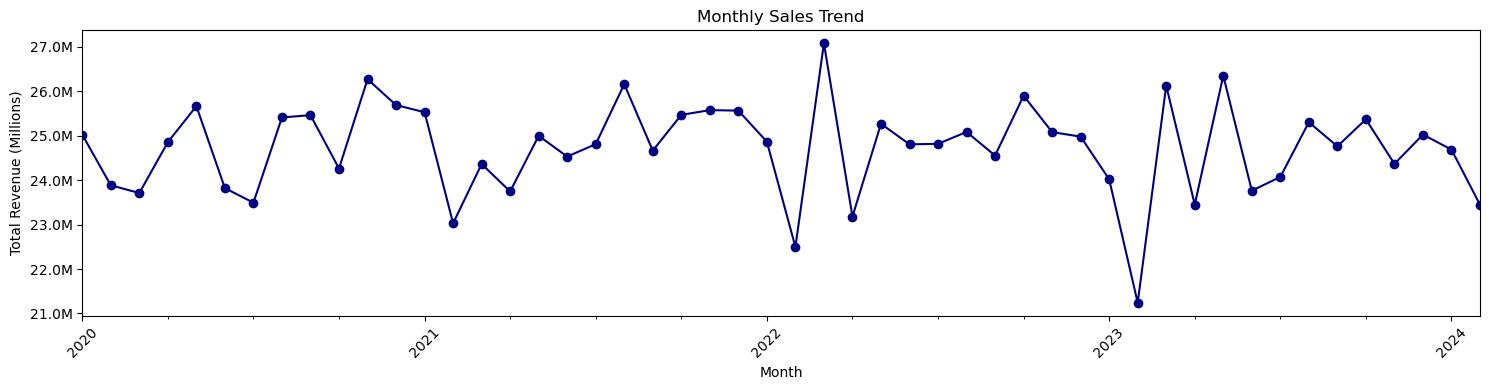

In [44]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Add order_month column (YYYY-MM)
df["order_month"] = df["order_date"].dt.to_period("M")

# Group by order_month and sum revenue
monthly_sales = df.groupby("order_month")["revenue"].sum()

# Plot
ax = monthly_sales.plot(marker='o', color='navy', figsize=(15,4))

# Format y-axis in millions
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Titles and labels
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue (Millions)")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


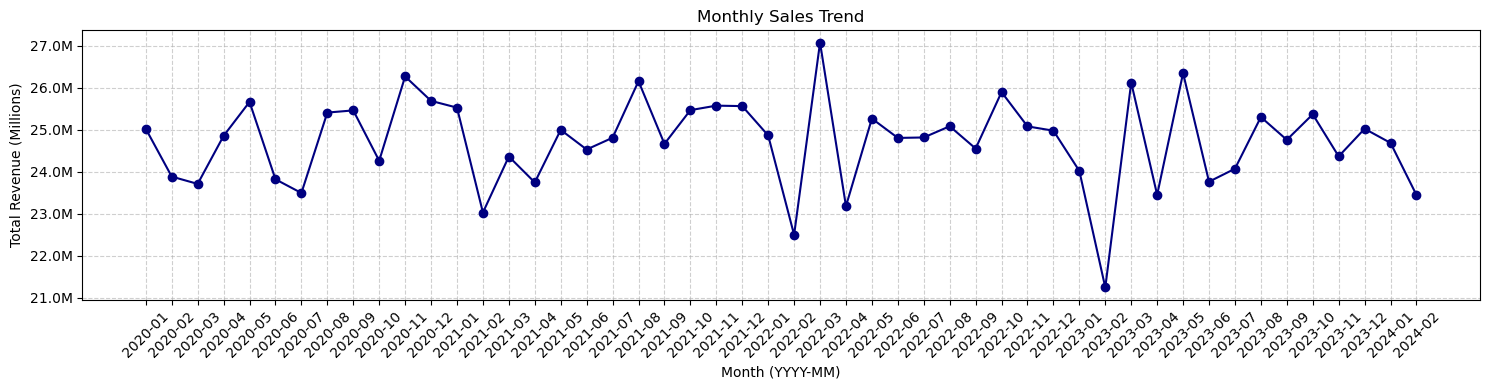

In [45]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Add order_month column (YYYY-MM string)
df["order_month"] = df["order_date"].dt.to_period("M").astype(str)

# Group by order_month and sum revenue
monthly_sales = df.groupby("order_month")["revenue"].sum()

# Plot
fig, ax = plt.subplots(figsize=(15,4))
ax.plot(monthly_sales.index, monthly_sales.values, marker='o', color='navy')

# Format y-axis in millions
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))

# Titles and labels
ax.set_title("Monthly Sales Trend")
ax.set_xlabel("Month (YYYY-MM)")
ax.set_ylabel("Total Revenue (Millions)")

# Show every month-year on x-axis
ax.set_xticks(monthly_sales.index)
plt.xticks(rotation=45)

# Grid for each month and year
ax.grid(True, which="both", axis="both", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


In [46]:
df.to_csv('final.csv')

In [47]:
#Assuming of is your DataFrame
#Convert order date to datetime (if not already)
df ['order_date'] = pd.to_datetime (df['order_date'])
#Remove records from January and February 2018
df_new = df[~((df['order_date'].dt.year == 2024) & (df["order_date"].dt.month.isin([1, 2])))]
#Verify the removal
print("Records after removing January and February 2024:")
print(df['order_date'].dt.to_period('M').value_counts().sort_index())

Records after removing January and February 2024:
order_date
2020-01    1314
2020-02    1237
2020-03    1261
2020-04    1274
2020-05    1322
2020-06    1257
2020-07    1278
2020-08    1290
2020-09    1324
2020-10    1260
2020-11    1319
2020-12    1317
2021-01    1341
2021-02    1199
2021-03    1278
2021-04    1248
2021-05    1281
2021-06    1293
2021-07    1283
2021-08    1331
2021-09    1272
2021-10    1361
2021-11    1262
2021-12    1324
2022-01    1314
2022-02    1153
2022-03    1378
2022-04    1229
2022-05    1322
2022-06    1269
2022-07    1311
2022-08    1287
2022-09    1266
2022-10    1326
2022-11    1278
2022-12    1304
2023-01    1234
2023-02    1134
2023-03    1339
2023-04    1220
2023-05    1348
2023-06    1228
2023-07    1292
2023-08    1269
2023-09    1298
2023-10    1304
2023-11    1284
2023-12    1313
2024-01    1295
2024-02    1183
Freq: M, Name: count, dtype: int64


/var/folders/_y/lb515fnd1pg7z0g11cxmndcc0000gn/T/ipykernel_17477/1271915037.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['order_date'] = pd.to_datetime(df_new['order_date'])
/var/folders/_y/lb515fnd1pg7z0g11cxmndcc0000gn/T/ipykernel_17477/1271915037.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['month'] = df_new['order_date'].dt.strftime('%B')


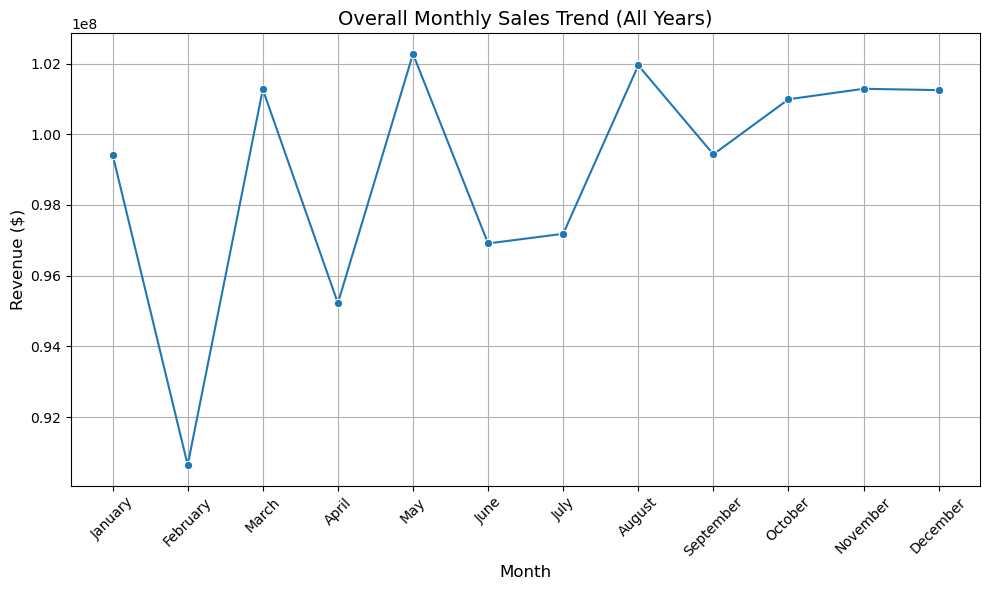

In [48]:
# Assuming df is your DataFrame
#Convert order_date to datetime
df_new['order_date'] = pd.to_datetime(df_new['order_date'])
#Extract month name for grouping
df_new['month'] = df_new['order_date'].dt.strftime('%B')
#Aggregate revenue by month across all years
monthly_trend = df_new.groupby('month')['revenue'].sum().reset_index()
#Sort months in calendar order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_trend['month'] = pd.Categorical(monthly_trend['month'], categories=month_order, ordered=True)
monthly_trend = monthly_trend.sort_values('month')
#Create the line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=monthly_trend, x='month', y='revenue', marker='o')
plt.title('Overall Monthly Sales Trend (All Years)', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks (rotation=45)
plt.grid(True)
plt.tight_layout()
#show the plot
plt.show()

In [49]:
# Assuming of is your DataFrame
# Aggregate revenue by product name
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()
#Get top 10 products by revenue
top_10_products = product_revenue.sort_values(by='revenue', ascending=False).head (10)
#Print data for Chart.js
labels=top_10_products['product_name'].tolist()
data=top_10_products['revenue'].tolist()
print("Labels for Chart.js:", labels)
print("Data for Chart.js:", data)
#The Chart.js config above should be updated with these labels and data

Labels for Chart.js: ['Product 26', 'Product 25', 'Product 13', 'Product 14', 'Product 5', 'Product 15', 'Product 2', 'Product 4', 'Product 1', 'Product 3']
Data for Chart.js: [112454990.9, 105715762.4, 75190019.7, 72516666.10000001, 68032711.2, 64933726.7, 54976803.1, 54558669.5, 53678832.2, 49935227.300000004]


/var/folders/_y/lb515fnd1pg7z0g11cxmndcc0000gn/T/ipykernel_17477/1044447929.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')


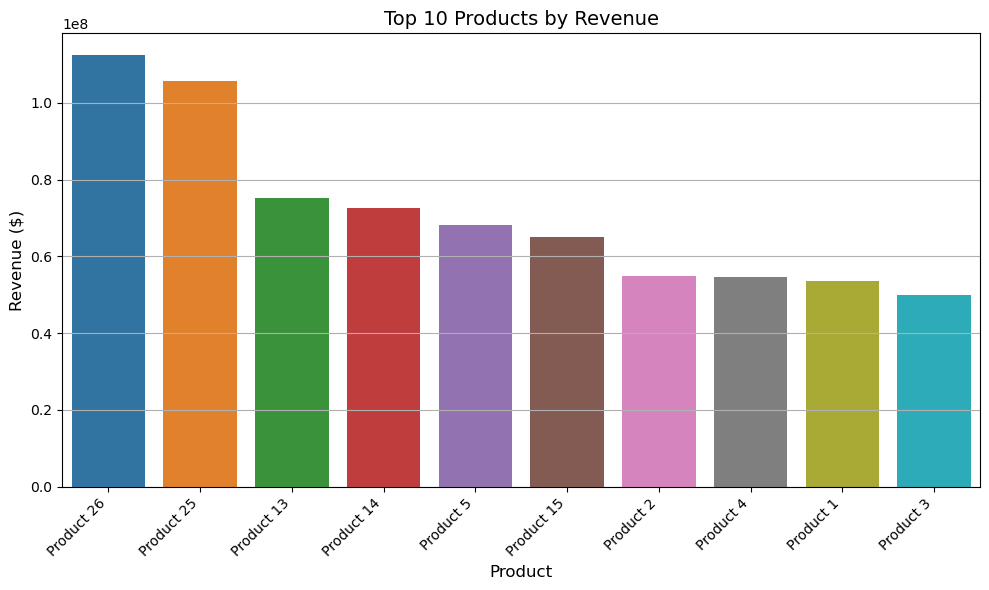

In [50]:
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()
#Get top 10 products by revenue
top_10_products=product_revenue.sort_values (by='revenue', ascending=False).head (10)
#Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')
plt.title('Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
#Show the plot
plt.show()

/var/folders/_y/lb515fnd1pg7z0g11cxmndcc0000gn/T/ipykernel_17477/3130620016.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')


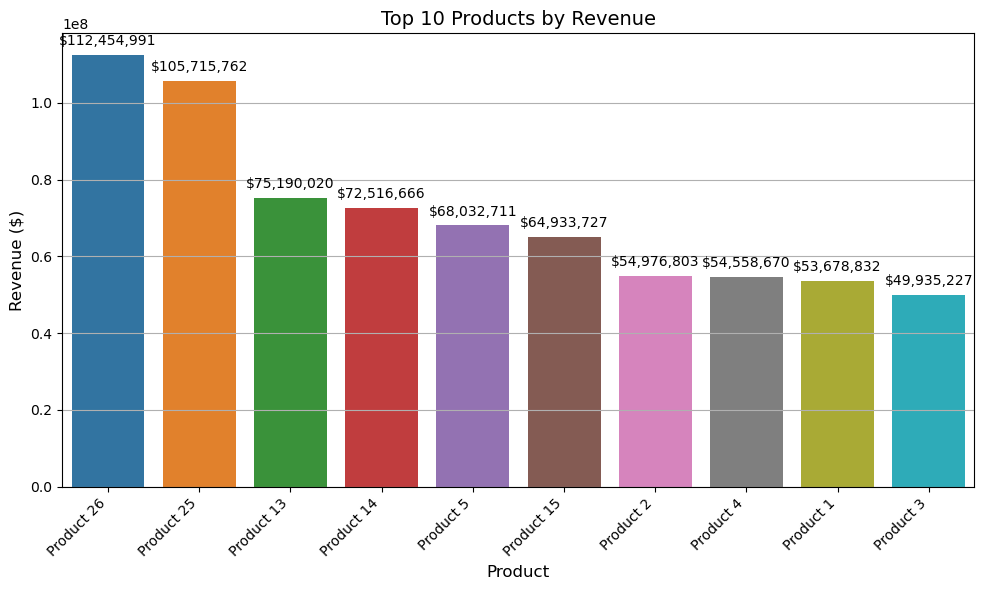

In [51]:
#Assuming df is your DataFrame
#Aggregate revenue by product name
product_revenue=df_new.groupby('product_name')['revenue'].sum().reset_index()
#Get top 10 products by revenue
top_10_products=product_revenue.sort_values(by='revenue', ascending=False).head(10)
#Create the bar chart
plt.figure(figsize=(10, 6))
barplot=sns.barplot(data=top_10_products, x='product_name', y='revenue', palette='tab10')
#Add labels on top of each bar 
for p in barplot.patches:
    barplot.annotate(f'${p.get_height():,.0f}',
                     (p.get_x()+ p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black',
                     xytext=(0,5), textcoords='offset points')
plt.title( 'Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks (rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
#Show the plot
plt.show()

/var/folders/_y/lb515fnd1pg7z0g11cxmndcc0000gn/T/ipykernel_17477/1479155042.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(data=bottom_10_products, x='product_name', y='revenue', palette='tab10')


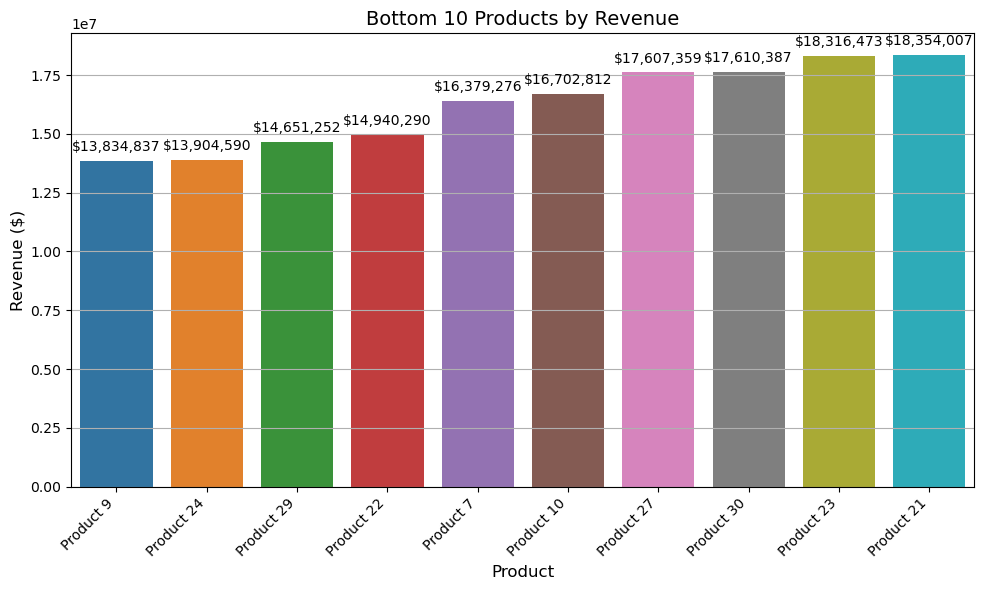

In [52]:
# Aggregate revenue by product name
product_revenue = df_new.groupby('product_name')['revenue'].sum().reset_index()

# Get bottom 10 products by revenue
bottom_10_products = product_revenue.sort_values(by='revenue', ascending=True).head(10)

# Create the bar chart
plt.figure(figsize=(10, 6))
barplot = sns.barplot(data=bottom_10_products, x='product_name', y='revenue', palette='tab10')

# Add labels on top of each bar 
for p in barplot.patches:
    barplot.annotate(f'${p.get_height():,.0f}',
                     (p.get_x() + p.get_width()/2., p.get_height()),
                     ha='center', va='bottom', fontsize=10, color='black',
                     xytext=(0, 5), textcoords='offset points')

plt.title('Bottom 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Revenue ($)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.tight_layout()

# Show the plot
plt.show()


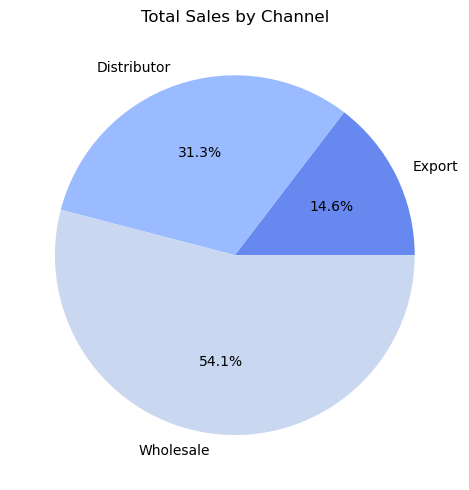

In [53]:
## Sales by Channel
chan_sales=df.groupby('channel')['revenue'].sum().sort_values(ascending=True)
plt.figure(figsize=(5,5))
plt.pie(
    chan_sales.values,
    labels=chan_sales.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('coolwarm')
)
plt.title('Total Sales by Channel')
plt.tight_layout()
plt.show()

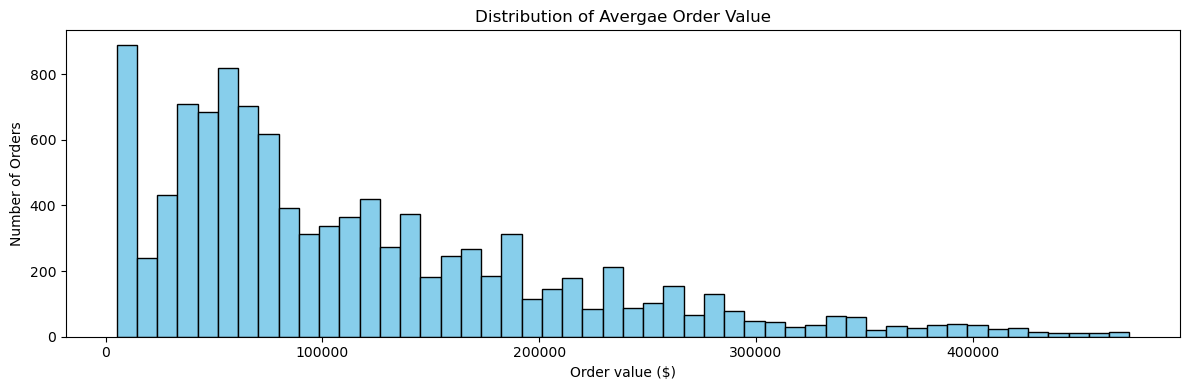

In [54]:
## Average order value(AOV) Distribution
aov= df.groupby('order_number')['revenue'].sum()
plt.figure(figsize=(12,4))
plt.hist(
    aov,
    bins=50,
    color='skyblue',
    edgecolor='black'
)
plt.title('Distribution of Avergae Order Value')
plt.xlabel('Order value ($)')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

In [55]:
# Unit price distribuiton per product
# profit margin vs unit price 
# top 10 states by revenue and order count
#average profit margin by channel
# top & bottom 10 customers by revenue
#customer segmentation revenue vs profit margin
#correlation heatmap


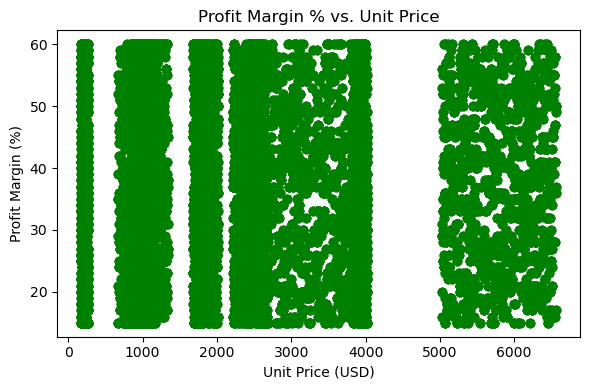

In [56]:
# Calculate profit margin percentage for each record
df['profit_margin_pct'] = (df['profit'] / df['revenue']) * 100

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot unit price vs. profit margin percentage
plt.scatter(
    df['unit_price'],            # X-axis: unit price in USD
    df['profit_margin_pct'],     # Y-axis: profit margin percentage
    alpha=0.6,                   # Transparency level for overlapping points
    color='green'                # Point color
)

# Add title and axis labels
plt.title('Profit Margin % vs. Unit Price')  # Chart title
plt.xlabel('Unit Price (USD)')                # X-axis label
plt.ylabel('Profit Margin (%)')               # Y-axis label

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the plot
plt.show()

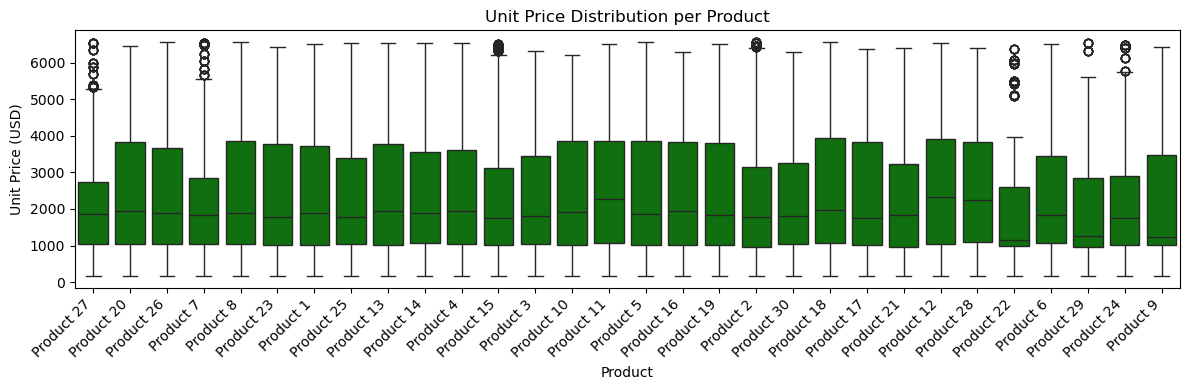

In [63]:
# Set figure size for clarity
plt.figure(figsize=(12,4))

# Create a boxplot of unit_price by product_name
sns.boxplot(
    data=df,
    x='product_name',   # X-axis: product categories
    y='unit_price',      # Y-axis: unit price values
    color='g'            # Box color
)

# Add title and axis labels
plt.title('Unit Price Distribution per Product')  # Chart title
plt.xlabel('Product')                              # X-axis label
plt.ylabel('Unit Price (USD)')                     # Y-axis label

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

/var/folders/_y/lb515fnd1pg7z0g11cxmndcc0000gn/T/ipykernel_17477/4019634111.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot (data=df_top_10, x= 'product_name', y='unit_price', palette='tab10')


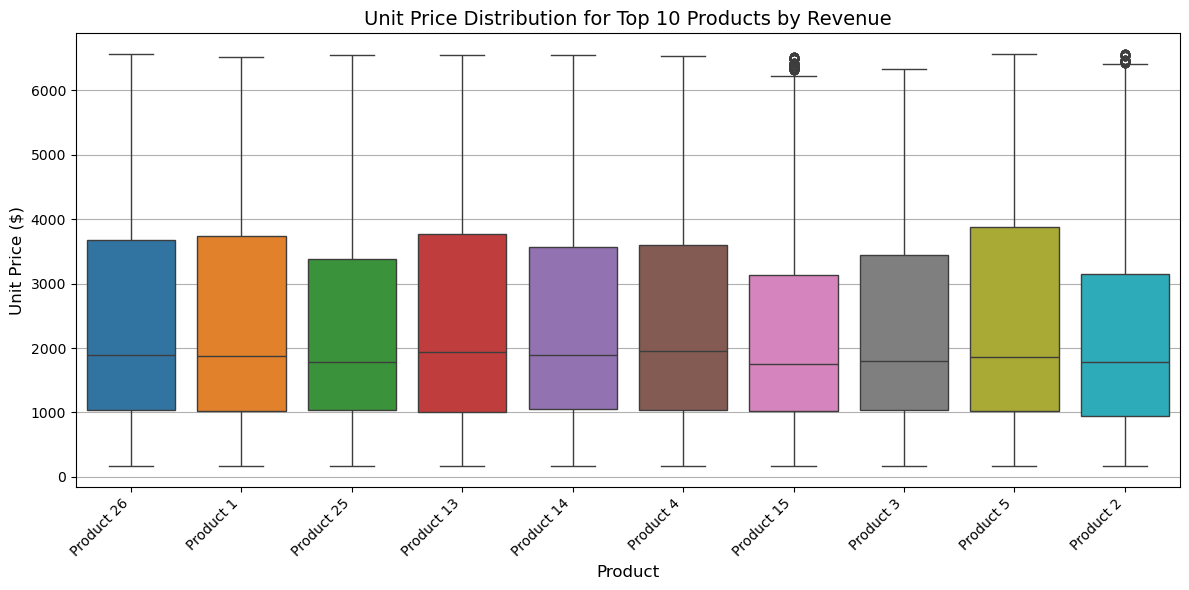

In [57]:
# Assuming df in data frame
#Get top 10 products by reνenue to focus the plot
product_revenue= df.groupby('product_name')['revenue'].sum().reset_index()
top_10_products= product_revenue.sort_values(by='revenue', ascending=False).head(10)['product_name'].tolist()
#Filter df to include only top 10 products
df_top_10 = df[df['product_name'].isin(top_10_products)]
#Create the boxplot
plt.figure(figsize=(12,6))
sns.boxplot (data=df_top_10, x= 'product_name', y='unit_price', palette='tab10')
plt.title('Unit Price Distribution for Top 10 Products by Revenue', fontsize=14)
plt.xlabel('Product', fontsize=12)
plt.ylabel('Unit Price ($)',fontsize=12)
plt.xticks(rotation=45,ha='right')
plt.grid(True, axis='y')
plt.tight_layout()
#Show the plot
plt.show()

/var/folders/_y/lb515fnd1pg7z0g11cxmndcc0000gn/T/ipykernel_17477/673918402.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_revenue, x='state_name', y='revenue', palette='tab10')


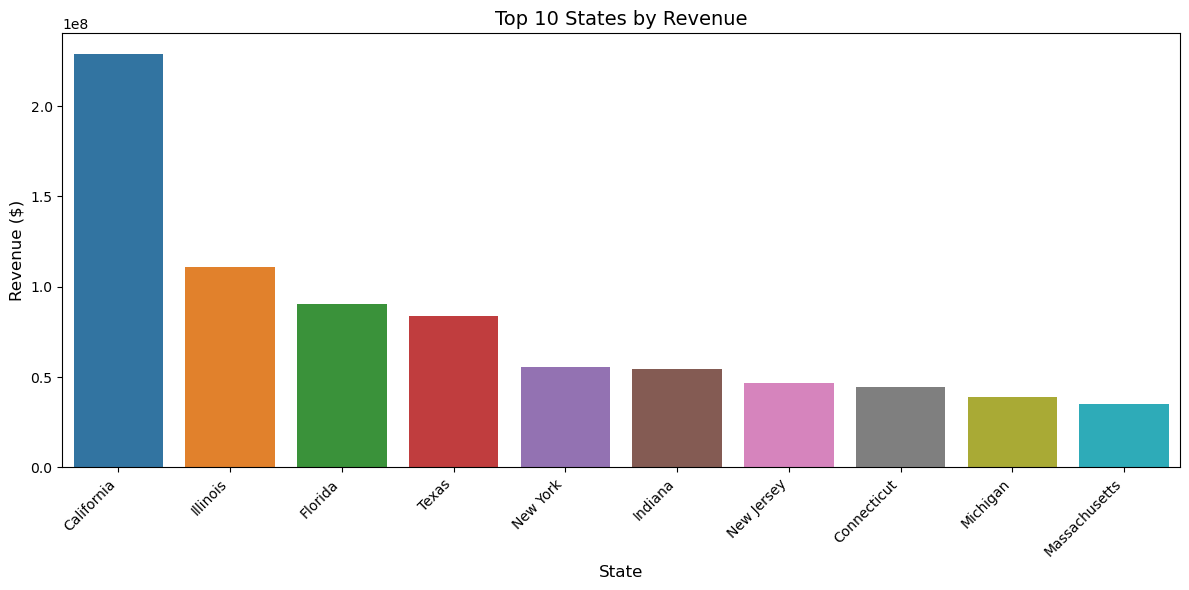

/var/folders/_y/lb515fnd1pg7z0g11cxmndcc0000gn/T/ipykernel_17477/673918402.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_orders, x='state_name', y='order_count', palette='tab10')


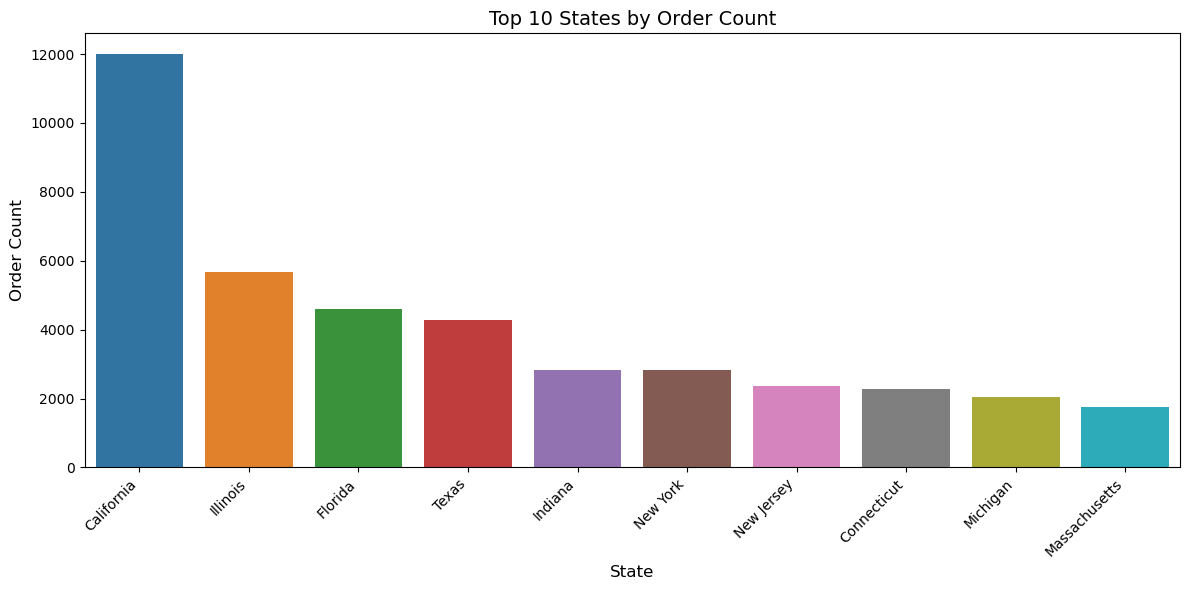

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate revenue and order count per state
state_stats = df.groupby('state_name').agg(
    revenue=('revenue', 'sum'),
    order_count=('order_number', 'count')
).reset_index()

# ---- Top 10 States by Revenue ----
top10_revenue = state_stats.sort_values(by='revenue', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10_revenue, x='state_name', y='revenue', palette='tab10')
plt.title("Top 10 States by Revenue", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Revenue ($)", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ---- Top 10 States by Order Count ----
top10_orders = state_stats.sort_values(by='order_count', ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10_orders, x='state_name', y='order_count', palette='tab10')
plt.title("Top 10 States by Order Count", fontsize=14)
plt.xlabel("State", fontsize=12)
plt.ylabel("Order Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Average Profit Margin by Channel:
       channel  profit_margin_percentage
0  Distributor                 37.557091
1       Export                 37.932704
2    Wholesale                 37.087236


/var/folders/_y/lb515fnd1pg7z0g11cxmndcc0000gn/T/ipykernel_17477/1055288116.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=channel_margin, x='channel', y='profit_margin_percentage', palette='viridis')


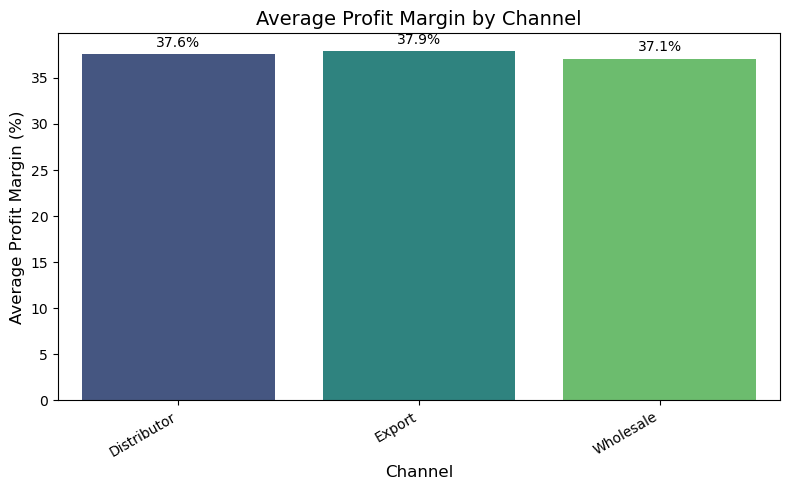

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate average profit margin per channel
channel_margin = df.groupby('channel')['profit_margin_percentage'].mean().reset_index()

print("Average Profit Margin by Channel:")
print(channel_margin)

# Plot average profit margin per channel
plt.figure(figsize=(8, 5))
ax = sns.barplot(data=channel_margin, x='channel', y='profit_margin_percentage', palette='viridis')

# Add percentage labels on top of bars
for p in ax.patches:
    ax.annotate(f"{p.get_height():.1f}%",  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 3),  
                textcoords='offset points')

plt.title("Average Profit Margin by Channel", fontsize=14)
plt.xlabel("Channel", fontsize=12)
plt.ylabel("Average Profit Margin (%)", fontsize=12)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


/var/folders/_y/lb515fnd1pg7z0g11cxmndcc0000gn/T/ipykernel_17477/1452768722.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/_y/lb515fnd1pg7z0g11cxmndcc0000gn/T/ipykernel_17477/1452768722.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


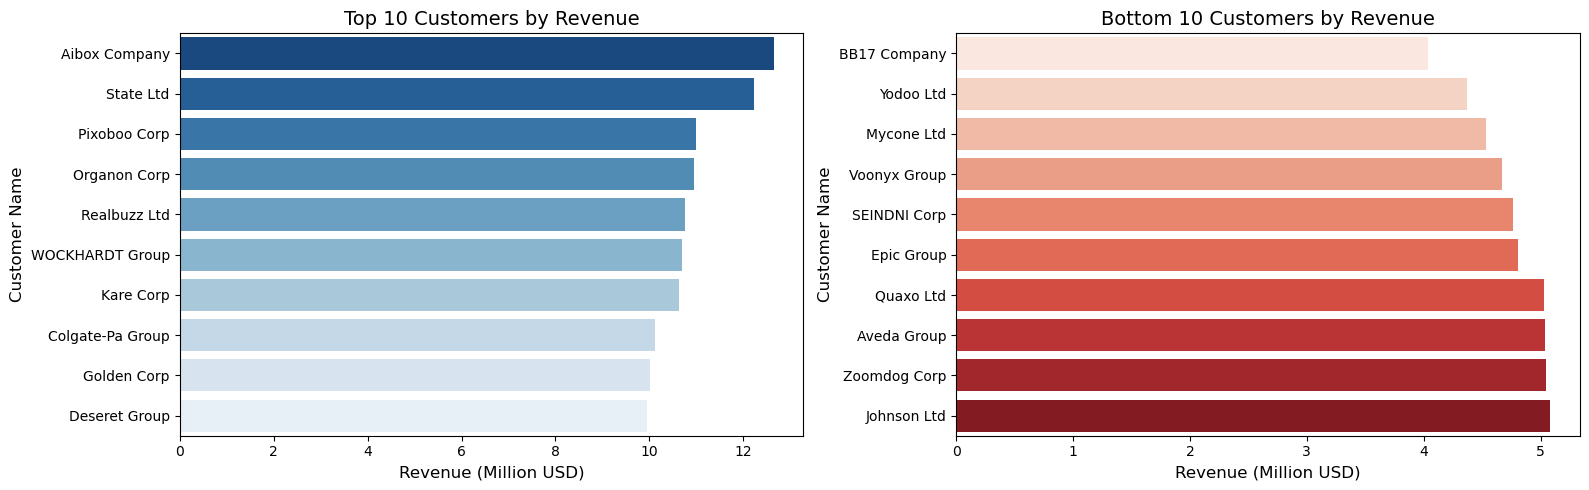

In [60]:
# 🔝 Calculate total revenue per customer and select top 10
top_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=False) # Sort from highest to lowest
      .head(10)                     # Keep top 10 customers
)

# 🔻 Calculate total revenue per customer and select bottom 10
bottom_rev = (
    df.groupby('customer_name')['revenue']
      .sum()                        # Sum revenue for each customer
      .sort_values(ascending=True)  # Sort from lowest to highest
      .head(10)                     # Keep bottom 10 customers
)

# Create a figure with two side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Plot 1: Top 10 customers by revenue (converted to millions)
sns.barplot(
    x=top_rev.values / 1e6,    # X-axis: revenue in millions
    y=top_rev.index,           # Y-axis: customer names
    palette='Blues_r',         # Color palette (reversed blues)
    ax=axes[0]                 # Draw on the left subplot
)
axes[0].set_title('Top 10 Customers by Revenue', fontsize=14)         # Title
axes[0].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[0].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Plot 2: Bottom 10 customers by revenue (converted to millions)
sns.barplot(
    x=bottom_rev.values / 1e6, # X-axis: revenue in millions
    y=bottom_rev.index,        # Y-axis: customer names
    palette='Reds',            # Color palette (reds)
    ax=axes[1]                 # Draw on the right subplot
)
axes[1].set_title('Bottom 10 Customers by Revenue', fontsize=14)      # Title
axes[1].set_xlabel('Revenue (Million USD)', fontsize=12)              # X-axis label
axes[1].set_ylabel('Customer Name', fontsize=12)                      # Y-axis label

# Adjust layout to prevent overlap and display both charts
plt.tight_layout()
plt.show()

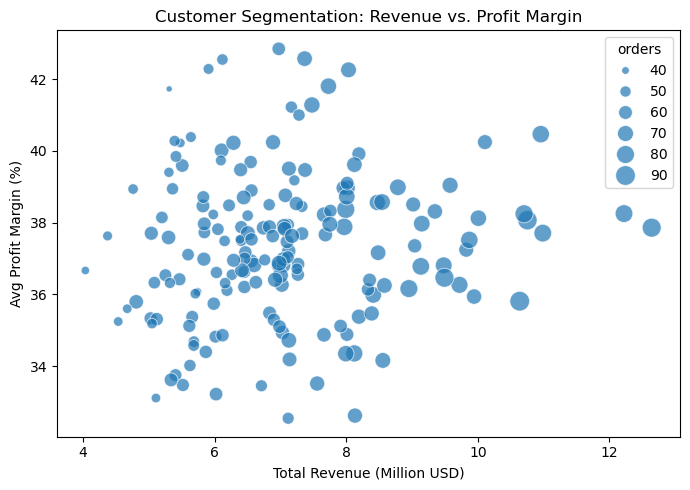

In [61]:
# Aggregate metrics per customer
cust_summary = df.groupby('customer_name').agg(
    total_revenue=('revenue', 'sum'),
    total_profit=('profit', 'sum'),
    avg_margin=('profit_margin_percentage', 'mean'),
    orders=('order_number', 'nunique')
)

# Convert revenue to millions
cust_summary['total_revenue_m'] = cust_summary['total_revenue'] / 1e6

plt.figure(figsize=(7, 5))

# Bubble chart with revenue in millions
sns.scatterplot(
    data=cust_summary,
    x='total_revenue_m',        # <-- use revenue in millions
    y='avg_margin',
    size='orders',
    sizes=(20, 200),
    alpha=0.7
)

plt.title('Customer Segmentation: Revenue vs. Profit Margin')
plt.xlabel('Total Revenue (Million USD)')  # <-- updated label
plt.ylabel('Avg Profit Margin (%)')

plt.tight_layout()
plt.show()


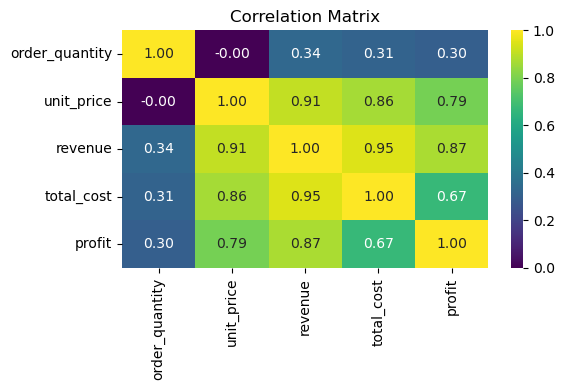

In [62]:
# List numeric columns to include in the correlation calculation
num_cols = ['order_quantity', 'unit_price', 'revenue', 'total_cost', 'profit']

# Calculate the correlation matrix for these numeric features
corr = df[num_cols].corr()

# Set the figure size for clarity
plt.figure(figsize=(6,4))

# Plot the heatmap with annotations and a viridis colormap
sns.heatmap(
    corr,           # Data: correlation matrix
    annot=True,     # Display the correlation coefficients on the heatmap
    fmt=".2f",      # Format numbers to two decimal places
    cmap='viridis'  # Color palette for the heatmap
)

# Add title for context
plt.title('Correlation Matrix')

# Adjust layout to prevent clipping
plt.tight_layout()

# Display the heatmap
plt.show()

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Aggregate total sales by region (in millions)
region_sales = (
    df
    .groupby('us_region')['revenue']
    .sum()
    .sort_values(ascending=False)  # so bars go top→bottom
    / 1e6                         # convert to millions
)

# 2. Plot
plt.figure(figsize=(10, 4))
sns.barplot(
    x=region_sales.values,
    y=region_sales.index,
    palette='Greens_r'          # dark→light green
)

# 3. Formatting
plt.title('Total Sales by US Region', fontsize=16, pad=12)
plt.xlabel('Total Sales (in Millions USD)', fontsize=12)
plt.ylabel('US Region', fontsize=12)
plt.xticks(rotation=0)
sns.despine(left=True, bottom=True)

plt.tight_layout()
plt.show()


KeyError: 'us_region'